In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from pandas.compat import StringIO
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import math
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = np.array(pd.read_csv('HTRU/HTRU_2.csv',sep=',',header=0))
y = df[:,-1]
x = df[:,:-1]

In [4]:
y = y.reshape((y.shape[0],1))

In [5]:
x = StandardScaler().fit_transform(x)

In [6]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print(principalComponents.shape)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

(17897, 3)


In [7]:
final = np.concatenate([principalComponents, y], axis = 1)
print(final.shape)

(17897, 4)


In [8]:
final_0 = []
final_1 = []

for i in range(len(final)):
    if final[i,-1] == 0:
        final_0.append(final[i,:-1])
    else:
        final_1.append(final[i,:-1])
        
final_0 = (np.array(final_0)).T
final_1 = (np.array(final_1)).T

In [9]:
final_0.shape

(3, 16258)

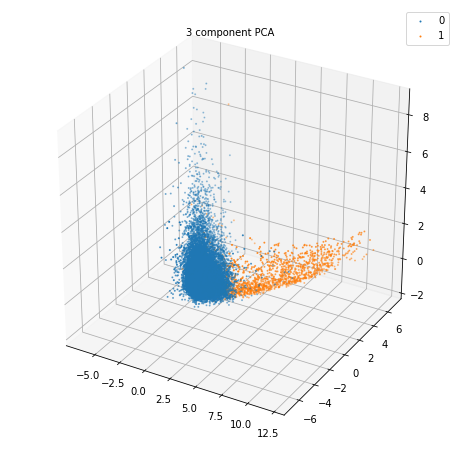

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3 component PCA', fontsize = 10)
Axes3D.scatter(ax,xs=final_0[0], ys=final_0[1],zs= final_0[2],label='0',s=1)
Axes3D.scatter(ax,xs=final_1[0], ys=final_1[1],zs= final_1[2],label='1',s=1)
# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
ax.legend()
# plt.savefig('3_component_PCA')

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents.shape)

(17897, 2)


In [12]:
final = np.concatenate([principalComponents, y], axis = 1)
print(final.shape)

(17897, 3)


In [13]:
final_0 = []
final_1 = []

for i in range(len(final)):
    if final[i,-1] == 0:
        final_0.append(final[i,:-1])
    else:
        final_1.append(final[i,:-1])
        
final_0 = (np.array(final_0)).T
final_1 = (np.array(final_1)).T

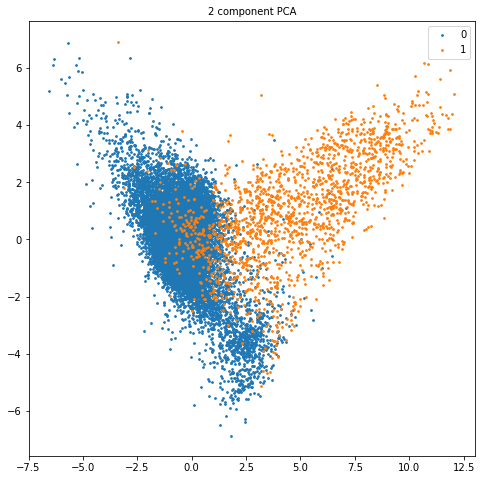

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title('2 component PCA', fontsize=10)
ax.scatter(final_0[0], final_0[1],label='0',s=3)
ax.scatter(final_1[0], final_1[1],label='1',s=3)
# ax.set_xlabel('PCA component 1')
# ax.set_ylabel('PCA component 2')
ax.legend()